In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [4]:
file1=pd.read_csv("encodedData.csv")
file1.head()

,duration,kills,placed,map,landed_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1189.68,7,1.0,olympus.s8,Gardens,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,681.19,0,4.0,olympus.s8,Solar Array,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,639.15,2,7.0,olympus.s8,Solar Array,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,133.47,0,14.0,olympus.s8,Hammond Labs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,239.60,2,12.0,olympus.s8,Gardens,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
file1.describe()

,duration,kills,placed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
count,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000
mean,385.689095,0.909345,11.433092,0.002413,0.000439,0.137490,0.007184,0.102665,0.020840,0.019305,0.001755,0.028463,0.028354,0.073544,0.004552,0.050016,0.072776,0.041845,0.051771,0.011956,0.001316,0.058407,0.003236,0.014533,0.018098,0.004991,0.007788,0.034496,0.002194,0.001261,0.002742,0.045026,0.048426,0.006252,0.002687,0.019853,0.048645,0.000713,0.021060,0.000219,0.002687
std,310.674149,1.571722,6.043422,0.049065,0.020942,0.344374,0.084458,0.303530,0.142853,0.137597,0.041857,0.166297,0.165986,0.261034,0.067316,0.217985,0.259776,0.200240,0.221571,0.108689,0.036257,0.234519,0.056793,0.119678,0.133310,0.070470,0.087906,0.182504,0.046787,0.035494,0.052295,0.207366,0.214671,0.078825,0.051771,0.139499,0.215131,0.026692,0.143587,0.014810,0.051771
min,30.810000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.330000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.475000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,551.060000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2111.740000,24.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:

file1=file1.drop("map", axis=1)
file1=file1.drop("landed_name", axis=1)
file1.describe()

,duration,kills,placed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
count,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000,18234.000000
mean,385.689095,0.909345,11.433092,0.002413,0.000439,0.137490,0.007184,0.102665,0.020840,0.019305,0.001755,0.028463,0.028354,0.073544,0.004552,0.050016,0.072776,0.041845,0.051771,0.011956,0.001316,0.058407,0.003236,0.014533,0.018098,0.004991,0.007788,0.034496,0.002194,0.001261,0.002742,0.045026,0.048426,0.006252,0.002687,0.019853,0.048645,0.000713,0.021060,0.000219,0.002687
std,310.674149,1.571722,6.043422,0.049065,0.020942,0.344374,0.084458,0.303530,0.142853,0.137597,0.041857,0.166297,0.165986,0.261034,0.067316,0.217985,0.259776,0.200240,0.221571,0.108689,0.036257,0.234519,0.056793,0.119678,0.133310,0.070470,0.087906,0.182504,0.046787,0.035494,0.052295,0.207366,0.214671,0.078825,0.051771,0.139499,0.215131,0.026692,0.143587,0.014810,0.051771
min,30.810000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.330000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.475000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,551.060000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2111.740000,24.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
corr_matrix = file1.corr()
print(corr_matrix['kills'].sort_values(ascending = False))
print(corr_matrix['duration'].sort_values(ascending = False))

kills       1.000000
duration    0.515319
0           0.022751
34          0.015921
14          0.014842
5           0.013056
2           0.012491
37          0.010408
33          0.009961
8           0.008404
24          0.006505
13          0.006488
10          0.006359
23          0.005507
4           0.004105
28          0.002596
11          0.002345
22          0.001609
1           0.001208
18          0.001123
9          -0.000448
31         -0.001050
21         -0.002116
3          -0.002117
30         -0.003393
16         -0.004250
27         -0.004315
36         -0.006214
20         -0.008157
25         -0.008483
17         -0.008493
19         -0.010231
29         -0.010396
26         -0.010731
7          -0.011754
35         -0.013655
15         -0.015500
6          -0.016253
12         -0.017501
32         -0.026311
placed     -0.479642
Name: kills, dtype: float64
duration    1.000000
kills       0.515319
14          0.065076
9           0.051954
29          0.050500
11    

In [8]:
'''
#Drop outlier
x = file1[( ( file1.kills == 12) | (file1.kills == 24) | (file1.kills == 14) | (file1.kills == 21) | (file1.kills == 15) )].index
file1=file1.drop(x)
'''

'\n#Drop outlier\nx = file1[( ( file1.kills == 12) | (file1.kills == 24) | (file1.kills == 14) | (file1.kills == 21) | (file1.kills == 15) )].index\nfile1=file1.drop(x)\n'

In [9]:
file1["kills"].value_counts()

0     10736
1      3489
2      1819
3       984
4       518
5       314
6       140
7       100
8        61
9        23
10       19
11       14
12        6
14        4
24        4
21        2
15        1
Name: kills, dtype: int64

In [10]:
'''
#undersampling data
list3= file1[(file1.kills == 0)].index
file1=file1.drop(list3[0:7000])
'''

'\n#undersampling data\nlist3= file1[(file1.kills == 0)].index\nfile1=file1.drop(list3[0:7000])\n'

In [11]:
file1.head()

,duration,kills,placed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1189.68,7,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,681.19,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,639.15,2,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,133.47,0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,239.60,2,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
file1["kills"].value_counts()

0     10736
1      3489
2      1819
3       984
4       518
5       314
6       140
7       100
8        61
9        23
10       19
11       14
12        6
14        4
24        4
21        2
15        1
Name: kills, dtype: int64

In [13]:
target_name='kills'
data_target = file1[target_name]
data = file1.drop([target_name], axis = 1)


In [14]:
data.head()

,duration,placed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1189.68,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,681.19,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,639.15,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,133.47,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,239.60,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:

imputer = SimpleImputer(strategy="median") 



kills_num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

kills_num_tr = kills_num_pipeline.fit_transform(data)
kills_numerical_features = list(data)
#patient_categorical_features = ["id","neighbourhood_group","neighbourhood","room_type"]

full_pipeline = ColumnTransformer([
        ("num", kills_num_pipeline, kills_numerical_features),
        #("cat", OneHotEncoder(), patient_categorical_features),
    ])

kills_prepared = full_pipeline.fit_transform(data)

In [16]:
kills_prepared

array([[ 2.58796219, -1.72640247, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885],
       [ 0.95118634, -1.22998133, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885],
       [ 0.815864  , -0.73356019, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885],
       ...,
       [ 0.28526138, -1.06450762, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885],
       [ 0.78560639, -1.39545504, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885],
       [ 0.53491886, -1.22998133, -0.04918243, ..., -0.14667176,
        -0.01481278, -0.05190885]])

In [17]:
train, test, target, target_test = train_test_split(kills_prepared, data_target, test_size = 0.2, random_state = 30)

In [18]:
print(train.shape)
print(target.shape)
print(test.shape)

(14587, 40)
(14587,)
(3647, 40)


In [20]:
accuracy_set=[0,0,0,0,0]
precision_set=[0,0,0,0,0]

In [24]:

model = Sequential()
model.add(Dense(80, input_dim=40, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train, target, epochs=150, batch_size=40)

Epoch 1/150
365/365 [==============================] - 1s 2ms/step - loss: 14.0203 - accuracy: 0.5923
Epoch 2/150
365/365 [==============================] - 1s 1ms/step - loss: 14.3090 - accuracy: 0.5894
Epoch 3/150
365/365 [==============================] - 1s 2ms/step - loss: 14.0292 - accuracy: 0.5888
Epoch 4/150
365/365 [==============================] - 1s 1ms/step - loss: 14.0981 - accuracy: 0.5878
Epoch 5/150
365/365 [==============================] - 1s 1ms/step - loss: 14.0059 - accuracy: 0.5933
Epoch 6/150
365/365 [==============================] - 1s 2ms/step - loss: 13.8710 - accuracy: 0.5940
Epoch 7/150
365/365 [==============================] - 1s 2ms/step - loss: 14.0196 - accuracy: 0.5876
Epoch 8/150
365/365 [==============================] - 1s 1ms/step - loss: 14.3828 - accuracy: 0.5869
Epoch 9/150
365/365 [==============================] - 1s 1ms/step - loss: 14.0835 - accuracy: 0.5878
Epoch 10/150
365/365 [==============================] - 1s 1ms/step - loss: 13.826

In [50]:
target_pred1 =model.predict(test)


In [51]:
MSE=mean_squared_error(target_test,target_pred1)

print("MSE is ", MSE)
R2=r2_score(target_test,target_pred1)
print("R2 score is ", R2)

MSE is  3.1420345489443378
R2 score is  -0.3357342429538861


In [53]:
from sklearn.preprocessing import label_binarize
y = label_binarize(target_test, classes=[0])

In [28]:
#......................................................................
#svm
svm = SVC(probability = True)
svm=svm.fit(train, target)
target_pred = svm.predict(test)

In [29]:
accuracy=metrics.accuracy_score(target_test,target_pred)
precision=metrics.precision_score(target_test,target_pred,average="weighted")

print("Accuracy is",accuracy)
print("Precision is",precision)

print(target_pred[25:50])
print(target_test[0:25])
accuracy_set[0]=accuracy
precision_set[0]=precision

Accuracy is 0.5900740334521525
Precision is 0.348187364954492
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
17356    0
3987     0
16330    5
9104     4
13767    1
13407    2
3400     0
13547    0
856      0
11264    0
5187     0
5324     2
15391    0
7765     4
13774    0
2892     0
14370    0
9280     0
6191     0
5027     1
10883    1
9882     0
14872    0
4522     2
5034     1
Name: kills, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Model Performance Results:

AUC of ROC:  0.5194241026469893


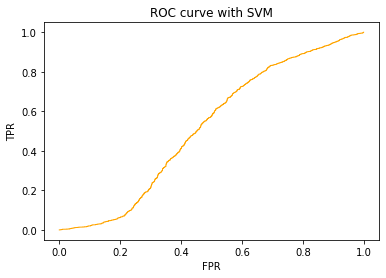

In [58]:
log_score=svm.predict_proba(test)[:,1]
metrics.roc_curve(y,log_score)
fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y,log_score)
print("Logistic Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC: ', aucroc)

In [32]:
print(log_score)
print(target_test)

[0.19042663 0.18998869 0.17237125 ... 0.18971961 0.18832762 0.25580287]
17356    0
3987     0
16330    5
9104     4
13767    1
        ..
4523     0
12040    2
3619     0
8215     0
15418    9
Name: kills, Length: 3647, dtype: int64


In [33]:
#svm with linear kernel
svm2 = SVC(kernel='linear',probability=True)
svm2=svm2.fit(train,target)
target_pred6 = svm2.predict(test)

In [34]:
accuracy=metrics.accuracy_score(target_test,target_pred6)
precision=metrics.precision_score(target_test,target_pred6,average="weighted")

print("Accuracy is",accuracy)
print("Precision is",precision)
accuracy_set[1]=accuracy
precision_set[1]=precision

Accuracy is 0.5900740334521525
Precision is 0.348187364954492


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#knn

k = 26  
knnreg = KNeighborsClassifier(n_neighbors=k)
knnreg=knnreg.fit(train, target)

In [37]:
target_pred2=knnreg.predict(test)

In [38]:
print(target_pred2)

[0 0 1 ... 0 0 5]


In [39]:
accuracy=metrics.accuracy_score(target_test,target_pred2)
precision=metrics.precision_score(target_test,target_pred2,average="weighted")

print("Accuracy is",accuracy)
print("Precision is",precision)
accuracy_set[2]=accuracy
precision_set[2]=precision

Accuracy is 0.5856868659171922
Precision is 0.45729990521603703


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#normal logistic regresion

log_reg = LogisticRegression().fit(train,target)
target_pred3=log_reg.predict(test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
accuracy=metrics.accuracy_score(target_test,target_pred3)
precision=metrics.precision_score(target_test,target_pred3,average="weighted")

print("Accuracy is",accuracy)
print("Precision is",precision)
accuracy_set[3]=accuracy
precision_set[3]=precision

Accuracy is 0.5878804496846723
Precision is 0.4437517448309841


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#logistic regression with l1 penalty
log_reg2 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(train,target)
target_pred4=log_reg.predict(test)

In [45]:
accuracy=metrics.accuracy_score(target_test,target_pred4)
precision=metrics.precision_score(target_test,target_pred4,average="weighted")

print("Accuracy is",accuracy)
print("Precision is",precision)
accuracy_set[4]=accuracy
precision_set[4]=precision

Accuracy is 0.5878804496846723
Precision is 0.4437517448309841


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:


kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

log_model_kfold = LogisticRegression(penalty = 'l1', solver = 'liblinear')
svc_model_kfold = SVC(kernel='linear',probability=True)



# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
log_results_kfold = model_selection.cross_val_score(log_model_kfold, train, target, cv=kfold)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For Logistic Regression our mean accuracy across folds is: %.2f%%" % (log_results_kfold.mean()*100.0)) 
print("For an SVM Regression our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.mean()*100.0))


For Logistic Regression our mean accuracy across folds is: 59.00%
For an SVM Regression our mean accuracy across folds is: 58.85%


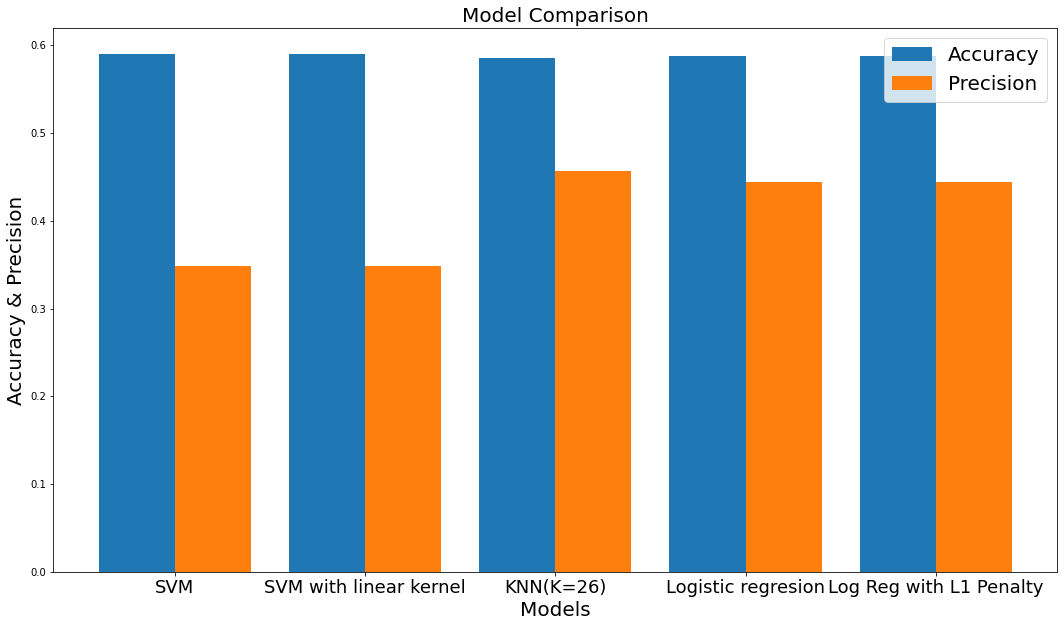

In [48]:

label_name=['SVM','SVM with linear kernel','KNN(K=26)','Logistic regresion','Log Reg with L1 Penalty']  
X_axis = np.arange(len(label_name))
plt.subplots(figsize=(18,10)) 
plt.bar(X_axis - 0.2, accuracy_set, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, precision_set, 0.4, label = 'Precision')


plt.xticks(X_axis, label_name,fontsize=18)
plt.xlabel("Models",fontsize=20)
plt.ylabel("Accuracy & Precision",fontsize=20)
plt.title("Model Comparison",fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [49]:
print(target_pred[0:25])
print(target_pred2[0:25])
print(target_pred3[0:25])
print(target_pred4[0:25])
print(target_pred6[0:25])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
[0 0 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0]
[0 0 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
